# Sklearn : Pre-processing

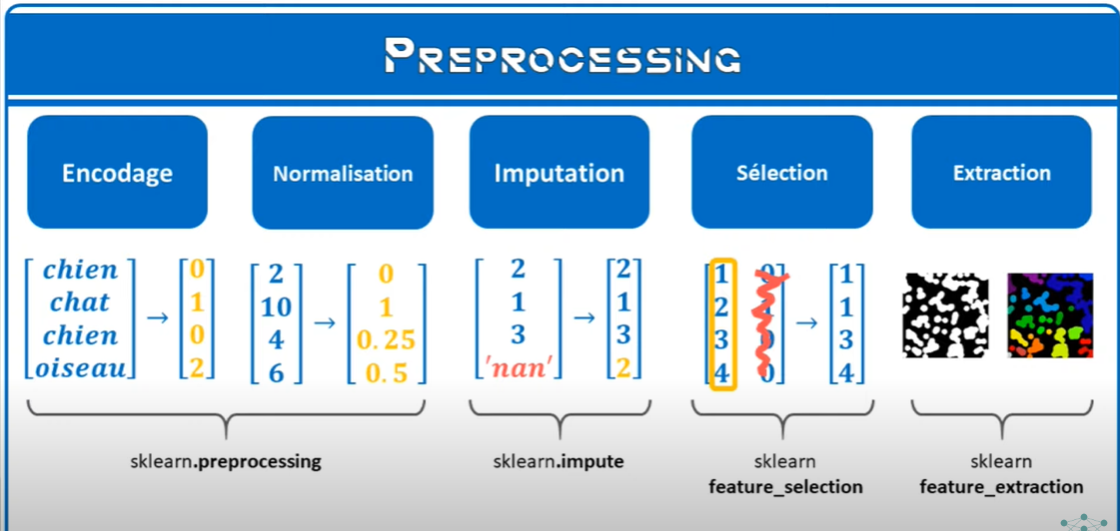

## 1. Encodage

What is encodage ? 

Machine learning models require all input and output variables to be numeric . This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model . The two most popular techniques are an Ordinal Encoding and a One-Hot Encoding. First we need to know what is Nominal & ordinal variable :

* Nominal Variable (Categorical) : Variable comprises a finite set of discrete values with no relationship between values.
* Ordinal Variable : Variable comprises a finite set of discrete values with a ranked ordering between values.

In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.

Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

In the “color” variable example, there are three categories, and, therefore, three binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

### 1.1 Encodage Ordinal: LabelEncoder & OrdinalEncoder 
    
    

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [2]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [3]:
encoder.inverse_transform(np.array([0, 0, 2]))

array(['chat', 'chat', 'oiseau'], dtype='<U6')

In [4]:
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

### 1.1 Encodage One Hot: LabelBinarizer & OneHotEncoder 

In [5]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [6]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [7]:
encoder = OneHotEncoder()                                # sparse = True by default
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [8]:
encoder = OneHotEncoder(sparse=False)                                
encoder.fit_transform(X)

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

# 2. Normalisation

MinMaxScaler & StandardScaler not good for datasets that contains outliers , so we better use RobustScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

### 2.1 MinMaxScaler

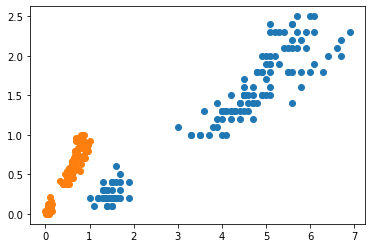

In [11]:
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_minmax[:, 2], X_minmax[:, 3]);

### 2.2 StandardScaler

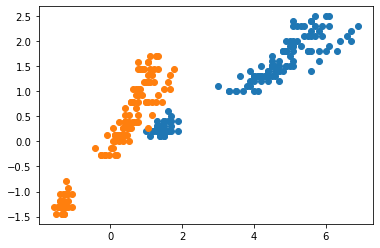

In [12]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3]);

### 2.3 RobustScaler

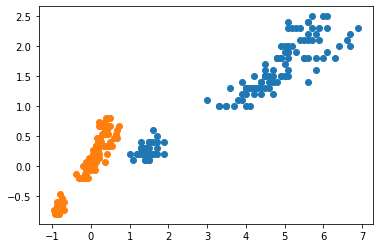

In [13]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3]);

## 3. Pipelines 

What is an ML pipeline? One definition of an ML pipeline is a means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated.

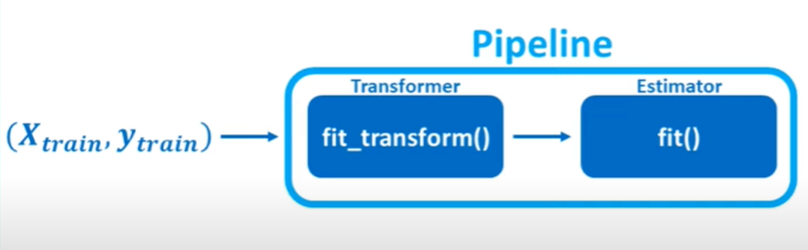 
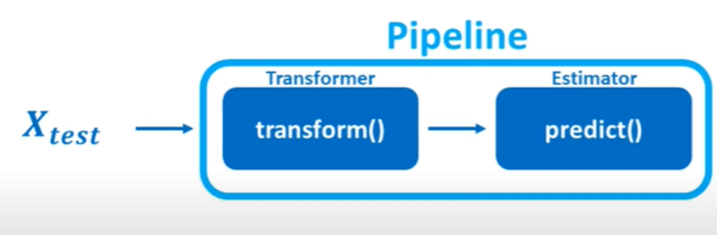
 

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

Exemple without pipeline

In [15]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
# Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimator 
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed,y_train)

# Test 
X_test_transformed = scaler.fit_transform(X_test)
model.predict(X_test_transformed)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2])

Exemple with pipeline

In [17]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

what if we don't use Normalisation 

In [18]:
model = SGDClassifier(random_state=0)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8421052631578947

advanced pipelines

In [19]:
import seaborn as sns

In [20]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
y = titanic['survived']
X = titanic.drop('survived',axis=1)

In [22]:
from sklearn.compose import make_column_selector , make_column_transformer
from sklearn.impute import SimpleImputer

numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

In [23]:
numerical_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())

In [24]:
preprocessor = make_column_transformer((numerical_pipeline,numerical_features),(categorical_pipeline,categorical_features))

In [25]:
model = make_pipeline(preprocessor , SGDClassifier())
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C1BEA07F40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEn